# Architecture

## Clearning tools 
MyForestplot prepares cleaning tools for preparing dataframe used for forestplot. These tools are mainly designed to use results of statsmodels results. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

import myforestplot as mfp

%load_ext autoreload
%autoreload 2

%load_ext watermark
%watermark -n -u -v -iv -w -p graphviz

Last updated: Thu Sep 15 2022

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

graphviz: not installed

pandas      : 1.4.1
statsmodels : 0.13.2
numpy       : 1.21.5
matplotlib  : 3.5.1
myforestplot: 0.1.9

Watermark: 2.3.1



In [2]:
data = pd.read_csv("titanic.csv")
data = data[["survived", "pclass", "sex", "age", "embark_town"]]
data = data.dropna()
res = smf.logit("survived ~ sex + age + embark_town", data=data).fit()

Optimization terminated successfully.
         Current function value: 0.509889
         Iterations 6


###  statsmodels_pretty_result_dataframe
This function converts statsmodelsresult into dataframe shape, adding number of observations for each category. 

In [3]:
order = ["age", "sex", "embark_town"]
cont_cols = ["age"]
item_order = {"embark_town": ['Southampton', 'Cherbourg', 'Queenstown']}
df = mfp.statsmodels_pretty_result_dataframe(data, res,  
                                             order=order,
                                             cont_cols=cont_cols,
                                             item_order=item_order,
                                             fml=".3f", 
                                             )
df

,category,item,0,1,risk,nobs,risk_pretty
3,age,age,0.979300,1.004771,0.991954,NaN,"0.99 (0.98, 1.00)"
0,sex,male,0.057848,0.122213,0.084082,453.0,"0.08 (0.06, 0.12)"
4,sex,female,NaN,NaN,NaN,259.0,Ref.
2,embark_town,Southampton,0.229654,0.581167,0.365332,554.0,"0.37 (0.23, 0.58)"
5,embark_town,Cherbourg,NaN,NaN,NaN,130.0,Ref.
1,embark_town,Queenstown,0.057027,0.464428,0.162742,28.0,"0.16 (0.06, 0.46)"


"statsmodels_pretty_result_dataframe" is made up of 5 steps.
1. Convert statasmodels results into dataframe.

In [4]:
df_res = mfp.statsmodels_fitting_result_dataframe(res, alpha=0.05, accessor=np.exp)
df_res

,category,item,0,1,risk
1,sex,male,0.057848,0.122213,0.084082
2,embark_town,Queenstown,0.057027,0.464428,0.162742
3,embark_town,Southampton,0.229654,0.581167,0.365332
4,age,age,0.979300,1.004771,0.991954


If you want to obtain raw results, set accessor as lambda x: x 

In [5]:
df_res2 = mfp.statsmodels_fitting_result_dataframe(res, alpha=0.05, accessor=lambda x: x)
df_res2

,category,item,0,1,risk
1,sex,male,-2.849937,-2.101986,-2.475962
2,embark_town,Queenstown,-2.864233,-0.766950,-1.815592
3,embark_town,Southampton,-1.471180,-0.542717,-1.006949
4,age,age,-0.020917,0.004760,-0.008079


2. Obtain number of observations for each category variable. 

In [6]:
cate_cols = [c for c in order if not c in cont_cols]
df_nobs = mfp.count_category_frequency(data, cate_cols)
df_nobs

,category,item,nobs
0,sex,male,453
1,sex,female,259
2,embark_town,Southampton,554
3,embark_town,Cherbourg,130
4,embark_town,Queenstown,28


3. Merge statsmodels resutl and dataframe of number of observations.

In [7]:
df_sum = pd.merge(df_res, df_nobs, on=["category", "item"], validate="1:1", how="outer")
df_sum

,category,item,0,1,risk,nobs
0,sex,male,0.057848,0.122213,0.084082,453.0
1,embark_town,Queenstown,0.057027,0.464428,0.162742,28.0
2,embark_town,Southampton,0.229654,0.581167,0.365332,554.0
3,age,age,0.979300,1.004771,0.991954,NaN
4,sex,female,NaN,NaN,NaN,259.0
5,embark_town,Cherbourg,NaN,NaN,NaN,130.0


4. Sort items.

In [8]:
df_sum = mfp.sort_category_item(df_sum, order=order, item_order=item_order)
df_sum

,category,item,0,1,risk,nobs
3,age,age,0.979300,1.004771,0.991954,NaN
0,sex,male,0.057848,0.122213,0.084082,453.0
4,sex,female,NaN,NaN,NaN,259.0
2,embark_town,Southampton,0.229654,0.581167,0.365332,554.0
5,embark_town,Cherbourg,NaN,NaN,NaN,130.0
1,embark_town,Queenstown,0.057027,0.464428,0.162742,28.0


5. Add pretty styles of risk results. 

In [9]:
df_sum["risk_pretty"] = mfp.add_pretty_risk_column(df_sum,
                                                   risk="risk",
                                                   lower=0,
                                                   upper=1,
                                                   fml=".2f"
                                                   )
df_sum

,category,item,0,1,risk,nobs,risk_pretty
3,age,age,0.979300,1.004771,0.991954,NaN,"0.99 (0.98, 1.00)"
0,sex,male,0.057848,0.122213,0.084082,453.0,"0.08 (0.06, 0.12)"
4,sex,female,NaN,NaN,NaN,259.0,Ref.
2,embark_town,Southampton,0.229654,0.581167,0.365332,554.0,"0.37 (0.23, 0.58)"
5,embark_town,Cherbourg,NaN,NaN,NaN,130.0,Ref.
1,embark_town,Queenstown,0.057027,0.464428,0.162742,28.0,"0.16 (0.06, 0.46)"


## SingleForestPlot 
The following is an illustration of how myforestplot works.  

In [10]:
df = df_sum.copy()

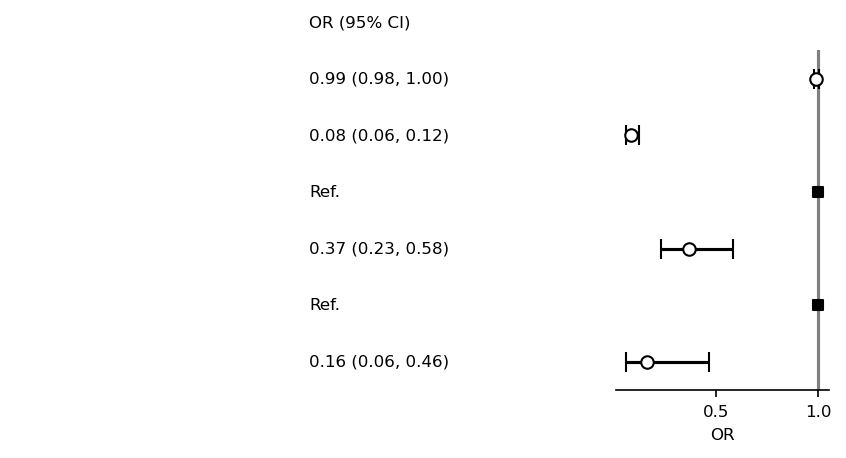

In [11]:
plt.rcParams["font.size"] = 8
fp = mfp.BaseForestPlot(ratio=(8,3), dpi=150, figsize=(7,3), df=df)
fp.errorbar(errorbar_kwds=None)
fp.ax2.set_xlabel("OR")
fp.ax2.axvline(x=1, ymin=0, ymax=1.0, color="black", alpha=0.5)
fp.embed_strings("risk_pretty", 0.5, header="OR (95% CI)")

plt.show()

BaseForestplot uses Gridspect to create 2 axes. One is for text, and one is for errorbar plot. To draw original axis ticks and labels for two axes.

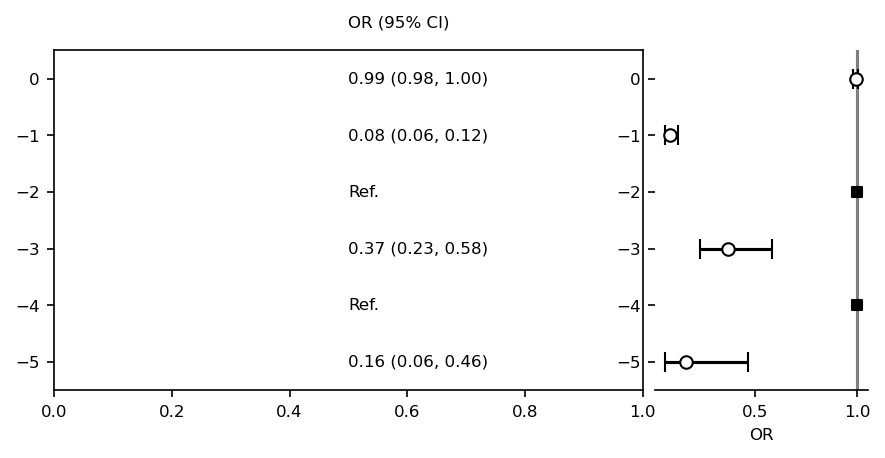

In [12]:
plt.rcParams["font.size"] = 8
fp = mfp.BaseForestPlot(ratio=(8,3), dpi=150, figsize=(7,3), df=df, 
                        yticks_show=True, 
                        yticklabels_show=True, 
                        xticks_show=True, 
                        text_axis_off=False)
fp.errorbar(errorbar_kwds=None)
fp.ax2.set_xlabel("OR")
fp.ax2.axvline(x=1, ymin=0, ymax=1.0, color="black", alpha=0.5)
fp.embed_strings("risk_pretty", 0.5, header="OR (95% CI)")

plt.show()

Originally, two axes shares yaxis, ranging from minus (number of plots - 1) to 0. For the text part axis, x axis ranges from 0 to one, and embed_strings just places text in this field.  
So we have to arrange x position of texts manually to draw beautiful figures. However, this packages just provide basic functionaly, meaning much customizability to draw forestplot based on your preferences.

Also see Gallery section to know what kind of designs are available.  